In [1]:
import pandas as pd
import pandasql as psql
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('resultsclean.csv')

sql_query = '''
WITH TranslationalDB AS (
    SELECT * FROM data
)
SELECT DISTINCT s1.name, s2.name
FROM TranslationalDB AS s1
INNER JOIN TranslationalDB AS s2 ON (
    s1.pos1 = s2.pos1 AND
    s1.pos2 = (s2.pos2 - 1) AND
    s1.ah = s2.ah AND
    s1.aw = s2.aw AND
    s1.bh = s2.bh AND
    s1.bw = s2.bw
)
WHERE s1.name != s2.name
UNION
SELECT DISTINCT s1.name, s2.name
FROM TranslationalDB AS s1
INNER JOIN TranslationalDB AS s2 ON (
    s1.pos1 = (s2.pos1 - 1) AND
    s1.pos2 = s2.pos2 AND
    s1.AH = s2.AH AND
    s1.AW = s2.AW AND
    s1.BH = s2.BH AND
    s1.BW = s2.BW
)
WHERE s1.name != s2.name

'''

result = psql.sqldf(sql_query, locals())

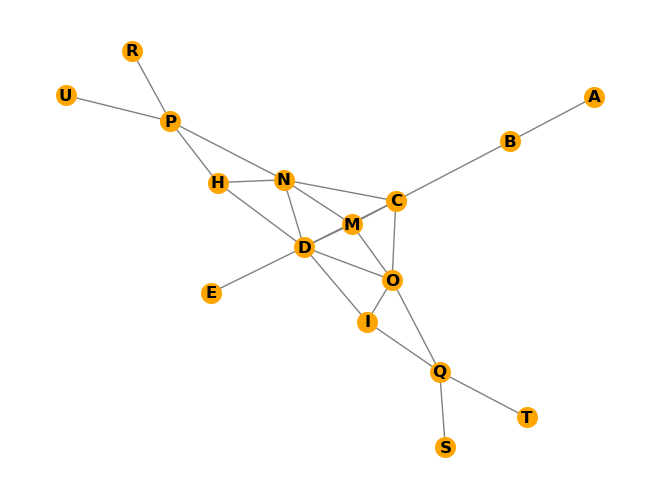

In [5]:
def draw_graph(edge_list):
    G = nx.Graph()
    G.add_edges_from(edge_list)

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=200, font_size=12, font_weight='bold', node_color='orange', edge_color='gray')
    plt.show()
result.columns = ['node1', 'node2']
edges = [tuple(x) for x in result.to_records(index=False)]
draw_graph(edges)